In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import welly
import lasio
import tkinter
import Stdlog

## <kbd> <b> Loading and Visualization of Log Data </b> </kbd>

In [7]:
well6 = Stdlog.stdlog(r'tutorial/WellX-6.las')

In [8]:
mnemonics= {
    'GR': 'GR',
    'CALI': 'CALI',
    'DEPTH': 'DEPTH',
    'TVD': 'TVD',
    'MSFL': 'I6FR',
    'CNL': 'CNL',
    'DENS': 'DENS',
    'SONI': 'SONI'
}

tracks = [['GR'], ['DEPTH','TVD'],['MSFL'], ['DENS', 'CNL']]
tr = [['GR', 'CALI'], ['TVD'],['DENS', 'CNL']]


shalebaseline = 70

<module 'matplotlib.pyplot' from '/home/mirzakhan/.local/share/virtualenvs/Stdlog-xUKvEn9n/lib/python3.6/site-packages/matplotlib/pyplot.py'>

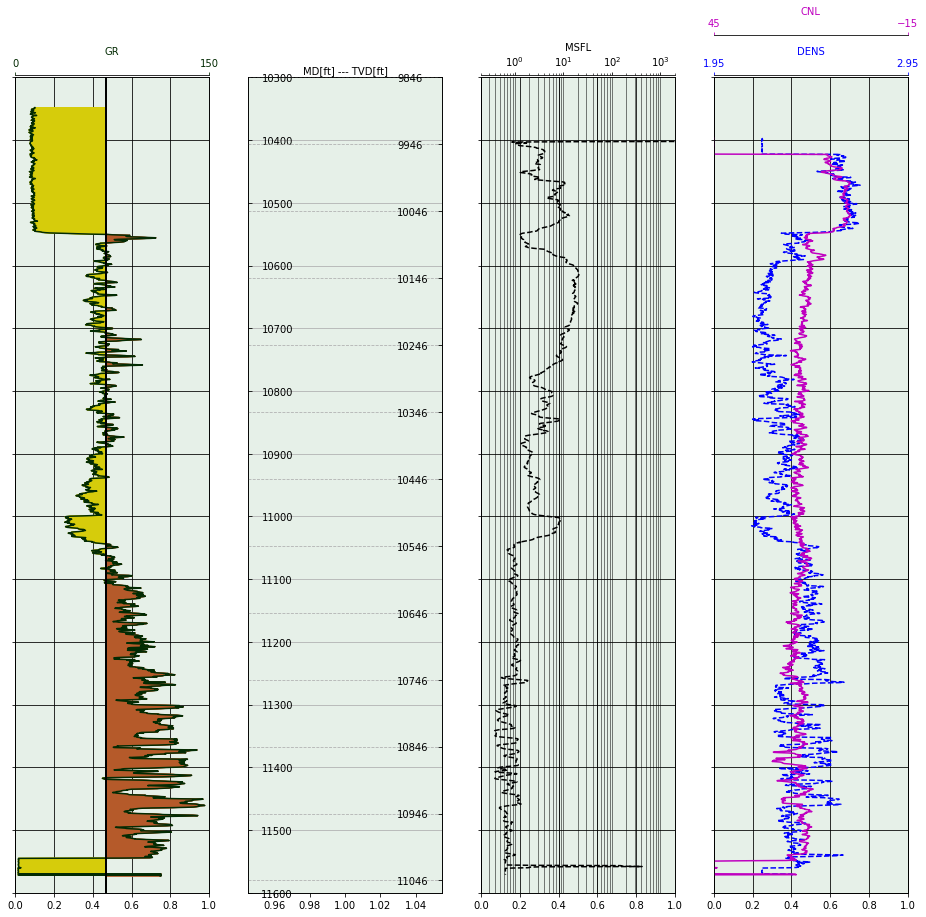

In [9]:
well6.visualize(mnemonics, pltrange = (10300, 11650), tracks = tracks, sbsline = (shalebaseline, 'shaded'))

In [10]:
well_6 = well6.wellobject
well_6 = well_6.df()

well_6['DEPTH'] = well_6.index*3.28084

## <kbd> <b>Lithology Investigation Using M N plot</b></kbd>

In [11]:
def calculate_MN (rhob, t, PhiN, rhof = 1, tf = 189,PhiN_f = 1):
    """
    A function that calculates the M N value for given petrophysical data
    
    Params:
        rhob (float): Bulk Density (g/cc)
        t    (float): Acoustic impedance time (us/ft)
        PhiN (float): Neutron Porosity in Limestone units
        rhof (float): Drilling fluid Density   (in  fresh mud systems this value is 1 gr/cc)
        tf   (float): Drilling fluid impedance (in fresh mud systems this value is 189 us/ft)
        PhiN_f      : In fresh mud systems this value is 1
    """
    
    M = 0.01 * (tf - t)/(rhob - rhof)
    N = (PhiN_f - PhiN)/(rhob - rhof)
    
    MN = { 
         "M": M,
         "N": N
        }
    
    return MN 

In [35]:
rhob = np.array(well_6.loc[(well_6['DEPTH']> 10900) & (well_6['DEPTH']< 11000)]['DENS'])
t    = np.array(well_6.loc[(well_6['DEPTH']> 10900) & (well_6['DEPTH']< 11000)]['SONI'])
PhiN = np.array(well_6.loc[(well_6['DEPTH']> 10900) & (well_6['DEPTH']< 11000)]['CNL'])/100

In [36]:
out = calculate_MN(rhob, t, PhiN)
out['TVD'] = np.array(well_6.loc[(well_6['DEPTH']> 10900) & (well_6['DEPTH'] <11000)]['TVD'])

MN = pd.DataFrame(out)

In [38]:
MN

,M,N,TVD
0,0.712225,0.591683,10395.81836
1,0.713539,0.590559,10396.26758
2,0.708014,0.590179,10396.71777
3,0.716394,0.604438,10397.16797
4,0.719868,0.605118,10397.61816
...,...,...,...
195,0.770024,0.656308,10483.38770
196,0.760422,0.641042,10483.83594
197,0.758870,0.637923,10484.28418
198,0.753794,0.628173,10484.73145


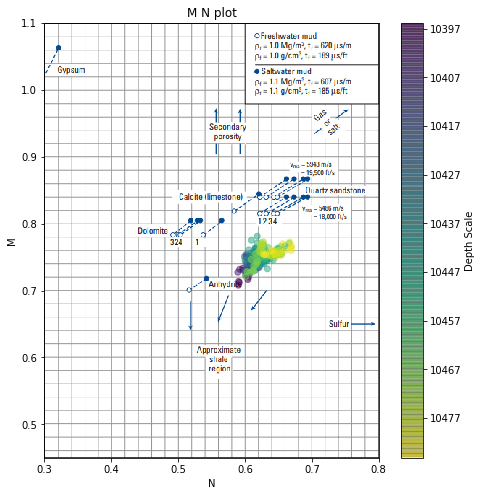

In [37]:
import matplotlib.image as mpimg
import matplotlib as mpl

fig = plt.figure(figsize = (8,8))
crossplot = mpimg.imread(r'meta/MNplot.png')
ax = fig.add_subplot(1,1,1)

c = np.array(MN['TVD'])
ax.set_xlabel('N')
ax.set_ylabel('M')
ax.set_title("M N plot")

ax.imshow(crossplot, extent = [0.3,0.8, 0.45, 1.1])
plt.scatter(MN['N'], MN['M'], alpha = 0.5, c = c, cmap = 'viridis')

norm = mpl.colors.Normalize(vmin=c.min(), vmax=c.max())
cbar = plt.colorbar(norm = norm, spacing = ['propotional'], ticks = np.arange(10397, 10485,10), drawedges = True)
cbar.set_label('Depth Scale')
cbar.ax.invert_yaxis()

## <kbd> <b>Determination of Porosity fron Density, Neutron, and Sonic Logs</b></kbd>

In [10]:
#Porosity using Density log values
def rhob2por(values, rho_ma, rhof):
    return (rho_ma - values)/(rho_ma - rhof)

#Porosity using Sonic log values
def sonic2por(values, tma, tf):
    return (values - tma)/(tf - tma)


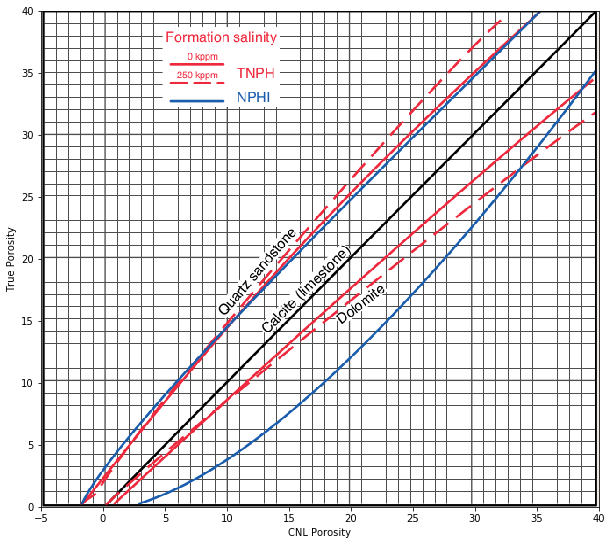

In [11]:
%matplotlib inline
import matplotlib.image as mpimg

fig = plt.figure(figsize = (10,10))
crossplot = mpimg.imread(r'meta/porosity.png')
ax = fig.add_subplot(1,1,1)
ax.set_ylabel('True Porosity')
ax.set_xlabel('CNL Porosity')
ax.imshow(crossplot, extent = [-5,40, 0, 40])

In [12]:
def cnl2por (value):
    #constants for sandstone
    A = 3
    B = 1.1378047138908756
    C = -0.003149046018584751
    
    return A + B*value + C*value**2

In [13]:
CNL = np.array(well_6.loc[(well_6['DEPTH']> 10600) & (well_6['DEPTH']< 11072)]['CNL'])
DENS = np.array(well_6.loc[(well_6['DEPTH']> 10600) & (well_6['DEPTH']< 11072)]['DENS'])
SONI = np.array(well_6.loc[(well_6['DEPTH']> 10600) & (well_6['DEPTH']< 11072)]['SONI'])
DEPTH = np.array(well_6.loc[(well_6['DEPTH']> 10600) & (well_6['DEPTH']< 11072)]['DEPTH'])

In [15]:
rhob_porosity = rhob2por(DENS, 2.65, 0.84)

In [16]:
rhob_porosity

array([0.14972376, 0.14917127, 0.14088398, 0.13149171, 0.14364641,
       0.15745856, 0.16464088, 0.18232044, 0.19337017, 0.20220994,
       0.20939227, 0.20939227, 0.19779006, 0.20331492, 0.20220994,
       0.21104972, 0.21823204, 0.22596685, 0.21104972, 0.20718232,
       0.20828729, 0.2121547 , 0.21712707, 0.20773481, 0.20994475,
       0.21325967, 0.21767956, 0.22044199, 0.21104972, 0.20994475,
       0.20828729, 0.20773481, 0.21491713, 0.22375691, 0.22596685,
       0.22541436, 0.22044199, 0.22265193, 0.22762431, 0.2320442 ,
       0.22762431, 0.22430939, 0.22541436, 0.22596685, 0.21767956,
       0.2160221 , 0.22430939, 0.22375691, 0.22375691, 0.22928177,
       0.2359116 , 0.22375691, 0.21823204, 0.22541436, 0.22872928,
       0.22430939, 0.21933702, 0.21767956, 0.22983425, 0.23701657,
       0.23370166, 0.23370166, 0.2281768 , 0.22265193, 0.22486188,
       0.22762431, 0.22099448, 0.22375691, 0.22375691, 0.22541436,
       0.22099448, 0.22707182, 0.23093923, 0.23480663, 0.23370

(array([ 17.,  46.,  73., 112., 104., 117., 148., 159., 111.,  57.]),
 array([0.13149171, 0.14624309, 0.16099448, 0.17574586, 0.19049724,
        0.20524862, 0.22      , 0.23475138, 0.24950276, 0.26425414,
        0.27900552]),
 <a list of 10 Patch objects>)

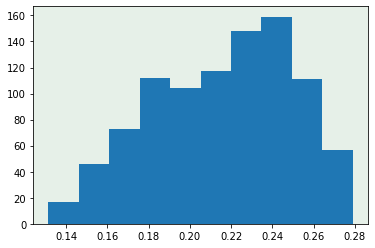

In [17]:
plt.hist(rhob_porosity)

In [21]:
sonic_porosity = sonic2por(SONI, 86, 189)

In [18]:
cnl_porosity = cnl2por(CNL)

(array([  4.,   1.,   2.,  21.,  76., 138., 243., 254., 154.,  51.]),
 array([15.11451416, 16.18221216, 17.24991016, 18.31760817, 19.38530617,
        20.45300417, 21.52070217, 22.58840017, 23.65609817, 24.72379618,
        25.79149418]),
 <a list of 10 Patch objects>)

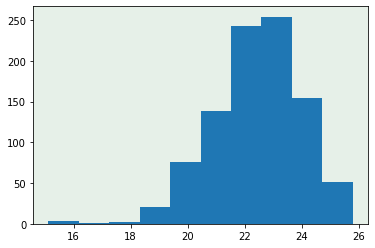

In [19]:
plt.hist(cnl_porosity)

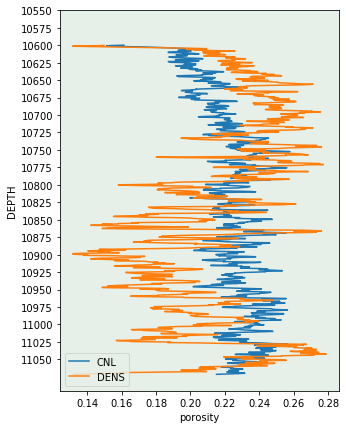

In [20]:
fig = plt.figure(figsize=(5,7))
plt.plot(cnl_porosity/100, DEPTH)
plt.plot(rhob_porosity, DEPTH)
plt.xlabel('porosity')
plt.ylabel('DEPTH')
plt.legend(['CNL', 'DENS'], loc = 'lower left')
plt.yticks(np.arange(10550, 11075, 25))
plt.gca().invert_yaxis()

<h3><b>Remarks:</b></h3>
    <p style = "font-size:1em;"> <b>As can be seen Porosity values derived from CNL log and Density logs highly matches.
    This shows any of those 2 porosity indicators can be used in further evaluations.
    Since bulk density derived values are more concrete and well referenced, the author selects
    <kbd>bulk density derived porosity for further analysis of the well</kbd
    </b> </p>

## <kbd> <b>Determination of Saturation</b></kbd>

In [21]:
from math import sqrt
from sklearn.linear_model import LinearRegression

In [22]:
porosity = (rhob_porosity + cnl_porosity/100) / 2
RT = np.array(well_6.loc[(well_6['DEPTH']> 10600) & (well_6['DEPTH']< 11072)]['I6FR'])
GR = np.array(well_6.loc[(well_6['DEPTH']> 10600) & (well_6['DEPTH']< 11072)]['GR'])
TVD = np.array(well_6.loc[(well_6['DEPTH']> 10600) & (well_6['DEPTH']< 11072)]['TVD'])

In [23]:
#creating a DataFrame to hold both porosity, Rt, and Depht
d = {
    'DEPTH': DEPTH,
    'Rt': RT,
    'GR':GR,
    'TVD':TVD,
    'density_porosity':rhob_porosity
}
df = pd.DataFrame(d)

<ul type = "disc" style = 'font-size:1.5em'> <li><b>Determination of Rw using Picket Plot</b></li></ul>

<IPython.core.display.Javascript object>


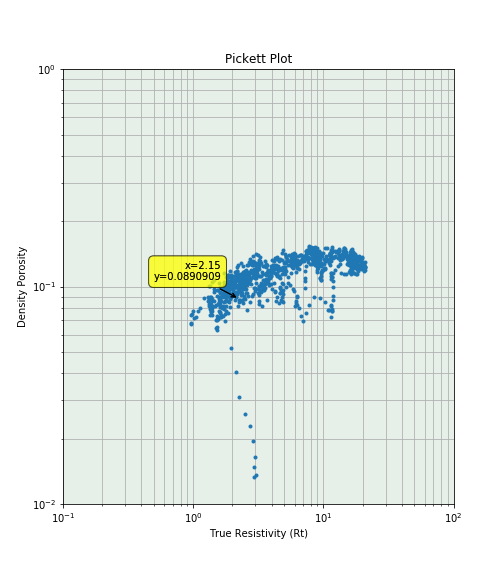

In [92]:
%matplotlib notebook

import matplotlib
import mplcursors

fig = plt.figure(figsize = (7,8))

x = np.array(df['Rt'])
y = np.array(df['Porosity'])


ax = fig.add_subplot(111)
ax.set_xlim(0.1,100)
ax.set_ylim(0.01, 1)

ax.set_xlabel('True Resistivity (Rt)')
ax.set_ylabel('Density Porosity')

li = ax.plot(x,y, '.')

mplcursors.cursor(hover = True)
ax.set_title("Pickett Plot")
ax.set_xscale(value = 'log')
ax.set_yscale(value = 'log')

ax.grid(True, which = 'both')


`From here it can be seen here resistivity values below 4 ohm-m can be selected for Sw 100% line Regression Analysis`

In [93]:
# The most South-Western points are selected, then log scale linear regression is done
# log(y) = k*log(x) + b which will then be as y = 10^b * x^k in our log-log plot

x_points = np.log10([0.96, 1.021]).reshape(-1,1)
y_points = np.log10([0.0736364,0.071812])


model = LinearRegression()

model.fit(x_points, y_points)

k = model.coef_
b = model.intercept_

print("the slope: {}".format(k))
print("The intercept: {}".format(b))

the slope: [-0.40724074]
The intercept: -1.1401273279302147


In [94]:
def lin2logPredict(x, k, b):
    return np.power(x, k) * np.power(10, b)

In [95]:
# Predicting end point porosities at Rt of 100 and 0.1
end_Rt = np.array([0.1, 100])
end_phi = lin2logPredict(end_Rt, k, b)

<IPython.core.display.Javascript object>


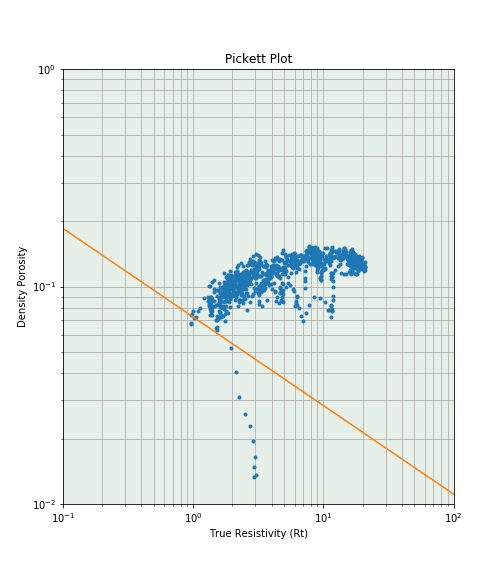

In [96]:
fig = plt.figure(figsize = (7,8))

x = np.array(df['Rt'])
y = np.array(df['Porosity'])


ax = fig.add_subplot(111)
ax.set_xlim(0.1,100)
ax.set_ylim(0.01, 1)

ax.set_xlabel('True Resistivity (Rt)')
ax.set_ylabel('Density Porosity')

ax.plot(x,y, '.')
ax.plot(end_Rt, end_phi)
mplcursors.cursor(hover = True)
ax.set_title("Pickett Plot")
ax.set_xscale(value = 'log')
ax.set_yscale(value = 'log')

ax.grid(True, which = 'both')

In [97]:
# Since in 100% water saturated formation Rt = Ro, and since Rw = (Ro * phi^m)/a
Ro = 4.6
pickett_phi = lin2logPredict(Ro, k, b)

In [98]:
Rw  = (Ro * pickett_phi[0]**2)/0.81 #Value is 0.054 ohm - m

In [99]:
Rw

0.008594372671360062

In [25]:
def calculate_Sw(data, a, m, Rw, n):
    phi = np.array(data['density_porosity'])
    Rt  = np.array(data['Rt'])
    F = a/(phi**m)
    
    return np.sqrt((F * Rw)/Rt)

In [26]:
Sw = calculate_Sw(df, 0.81, 2, 0.066, 2)

In [27]:
df['Sw']  = Sw

(array([303.,  92.,  73.,  46.,  38.,  24.,   8.,   4.,   7.,   5.]),
 array([0.20924664, 0.32649472, 0.4437428 , 0.56099088, 0.67823896,
        0.79548704, 0.91273512, 1.0299832 , 1.14723128, 1.26447935,
        1.38172743]),
 <a list of 10 Patch objects>)

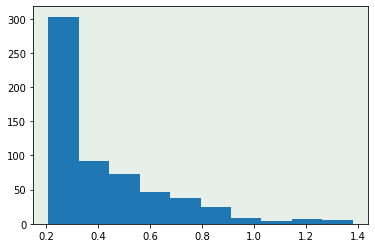

In [28]:
plt.hist(df.loc[(df.DEPTH > 10330) & (df.DEPTH < 10900)]['Sw'])

In [29]:
df.to_csv("Out/Well6-PorSw.csv")